In [2]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np
import math
from q_solve import generate_result
from q_solve import generate_result_more
from Schmidt_solve import compute_schmidt_full

from overlap import get_mean_rd_overlap


In [6]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 

idx = 50
state = compute_schmidt_full(result,idx+1,1)


so, 

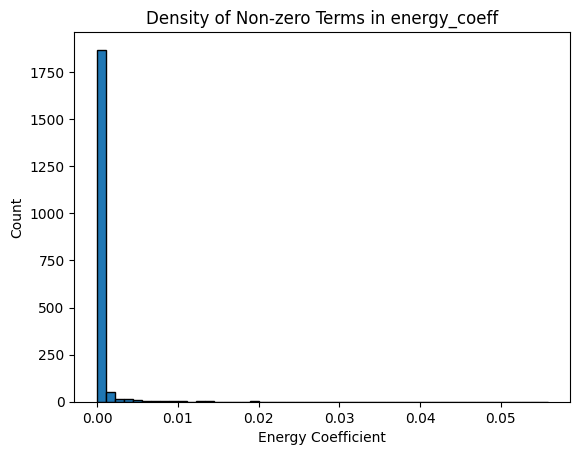

In [8]:
energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
plt.hist(energy_coeff, bins=50, edgecolor='black')
plt.title("Density of Non-zero Terms in energy_coeff")
plt.xlabel("Energy Coefficient")
plt.ylabel("Count")
plt.show()


In [3]:
mean = get_mean_rd_overlap()
print(mean)

[0.5856315516782777, 0.5414803117886992, 0.522279014099598, 0.5330687858410819, 0.5759907070747183, 0.5689632539857749, 0.5433634957711762, 0.553498618078892, 0.5447733676687749]
0.5521165673318881


In [11]:
w=[2,4,6,8,10,12,14,16,18,20]
for i, wi in enumerate(w):
    print(i)
    print(wi)

0
2
1
4
2
6
3
8
4
10
5
12
6
14
7
16
8
18
9
20


In the next few cells, we see that the density parameter of rand_herm is for the sparsness/

In [12]:
import numpy as np
H_system_2 = qt.rand_herm(1000,0.75)  # Random Hermitian matrix for system 2
H_system_1 = qt.rand_herm(100,1)  # Random Hermitian matrix for system 2
largest_norm = np.max(np.abs(H_system_2.full()))
print(largest_norm)
#note, largest term in matrix is dependant on matrix size. 

1.3786718528213493


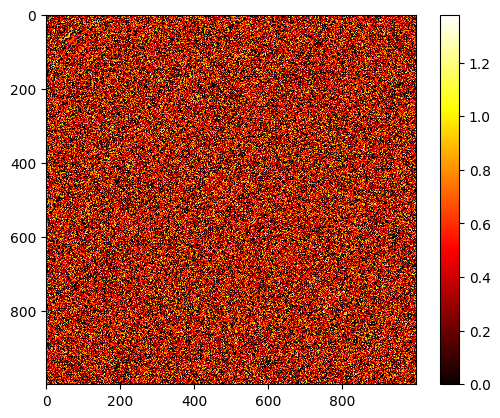

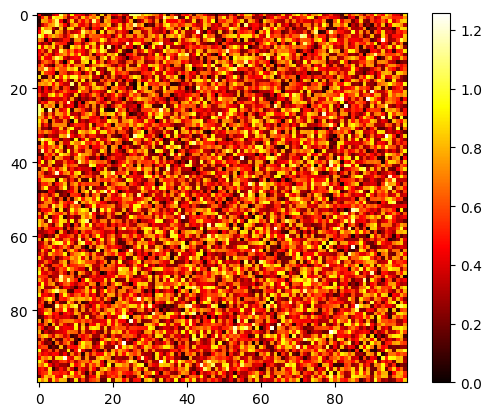

In [13]:

import matplotlib.pyplot as plt
a=H_system_2.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

a=H_system_1.full()
a = abs(a)
# Assuming H_system_2 is the matrix you want to visualize
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


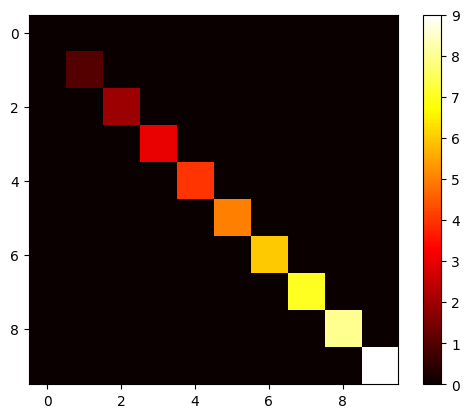

In [14]:
dim_system_1=10
energy_spacing = 1
diagonal_elements = np.arange(0, dim_system_1) * energy_spacing
H_q = qt.Qobj(np.diag(diagonal_elements)) # Create a diagonal matrix with increasing diagonal elements
H_q=abs(H_q.full())
plt.imshow(H_q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [15]:
def _rand_herm_sparse(N, density, pos_def):
    target = (1-(1-density)**0.5)
    num_elems = (N**2 - 0.666 * N) * target + 0.666 * N * density
    num_elems = max([num_elems, 1])
    num_elems = int(num_elems)
    data = (2 * np.random.rand(num_elems) - 1) + \
           (2 * np.random.rand(num_elems) - 1) * 1j
    row_idx, col_idx = zip(*[
        divmod(index, N)
        for index in np.random.choice(N*N, num_elems, replace=False)
    ])
    M = sp.coo_matrix((data, (row_idx, col_idx)),
                      dtype=complex, shape=(N, N))
    M = 0.5 * (M + M.conj().transpose())
    if pos_def:
        M = M.tocoo()
        M.setdiag(np.abs(M.diagonal()) + np.sqrt(2)*N)
    M = M.tocsr()
    M.sort_indices()
    return M

In [16]:
import scipy.sparse as sp
N=10
M = _rand_herm_sparse(N, 0.5, False)



Trying to figure out the wigner semi-circles of the random matrices.

I want to see the wigner semi-circle of H_rand_d1, id.otime.H_rand_d1 and H_rand_d1*d2.


In [17]:
def plot_e_spectrum_all(H_total,H_system_2,H_system_1_ext,H_system_2_ext,H_interaction, result,EI):
    eigenenergies_total, eigenstates_total = H_total.eigenstates() 
    eigenenergies_syst_2, eigenstates_total_syst_2 = H_system_2_ext.eigenstates()
    eigenenergies_int, eigenstates_int = H_interaction.eigenstates()

    min_energy=min(eigenenergies_total)
    max_energy=max(eigenenergies_total)
    min_energy_syst_2=min(eigenenergies_syst_2)
    max_energy_syst_2=max(eigenenergies_syst_2)
    min_energy_int=min(eigenenergies_int)  
    max_energy_int=max(eigenenergies_int)
    
    state = result.states[0]
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    c = np.count_nonzero(energy_coeff)
    num_bins=100
    
    plt.figure(figsize=(10, 2))
    plt.plot(eigenenergies_total,energy_coeff);
    plt.title(f"Plot of the probability that the global state be in an energy eigenstate for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.show()
    
    #looks like a nice wigner semicircle, this is the thing, who's shape changes as the interaction energy increases. lets check that
    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_total, bins=num_bins, range=(min_energy, max_energy), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_total for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_syst_2, bins=num_bins, range=(min_energy_syst_2, max_energy_syst_2), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_system_2_ext in eig_syste2 for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_int, bins=num_bins, range=(min_energy_int, max_energy_int), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_int in eig_int for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()


In [18]:
def shatten_p(A,p):
    eig_val,eig_vect = np.linalg.eig(A)
    shatten_p = np.sum(np.abs(eig_val)**p)**(1/p)
    return shatten_p

/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_31191/2719016647.py:4: RuntimeWarning: invalid value encountered in sqrt
  return 2/(np.pi*(10*k)**2)*(np.sqrt(k**2-x**2))


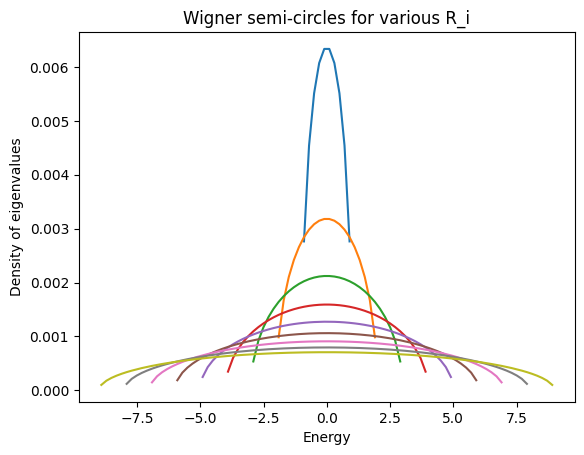

In [19]:
# Define the function generator
def generate_function(k):
    def f(x):
        return 2/(np.pi*(10*k)**2)*(np.sqrt(k**2-x**2))
    return f

# Define the range of x values
x = np.linspace(-100, 100, 1000)

# Calculate the sum of the functions
k_values = [1,2,3,4,5,6,7,8,9]  # Set the values of k
y_sum = np.zeros_like(x)  # Initialize the sum

for k in k_values:
    f = generate_function(k)
    y = f(x)
    plt.plot(x, y)
    y_sum += y
plt.title('Wigner semi-circles for various R_i')
plt.xlabel('Energy')
plt.ylabel('Density of eigenvalues')

plt.show()



In [23]:
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1)
eigenenergies_total, eigenstates_total = H_total.eigenstates()

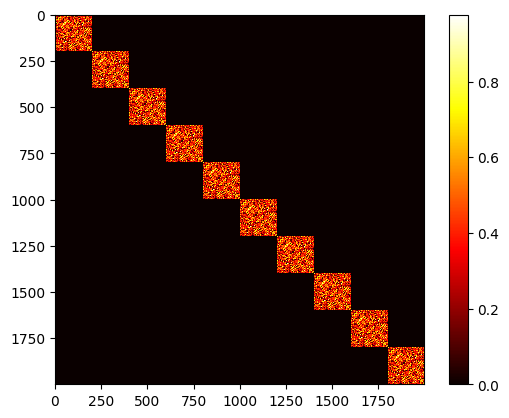

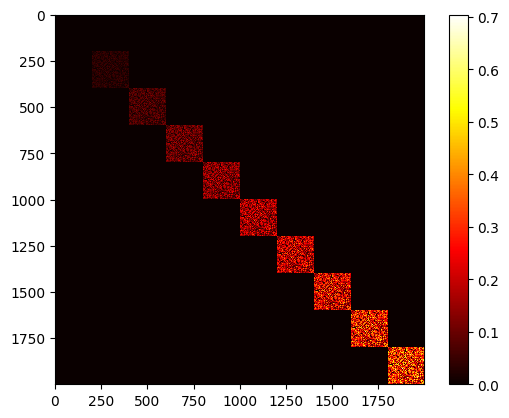

1010.362350164903
9.830607732228906


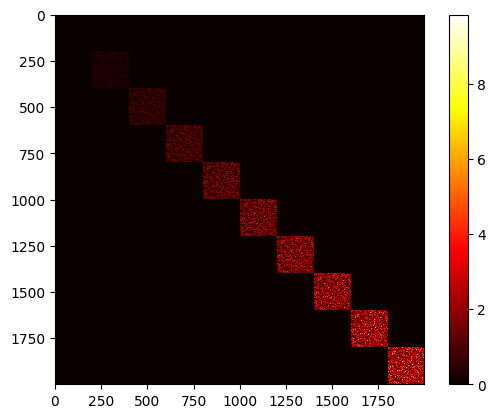

In [21]:
H_system_2_ext=H_system_2_ext.full()    
H_interaction=H_interaction.full()  
plt.imshow(abs(H_system_2_ext), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(abs(H_interaction), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
A = np.dot(H_system_2_ext,H_interaction)-np.dot(H_interaction,H_system_2_ext)
shatten = shatten_p(A,2)
print(shatten)
max_value = np.max(np.abs(A))
print(max_value)
plt.imshow(abs(A), cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

From what we have here, we conclude that the 2 matries definitely do not commute, and so do not share an eigenbasis. That is to say, eigenbasis of A and B are different from the eigenbasis of A+B. There might be something weird that allows me to still see their spectrums as summed though...

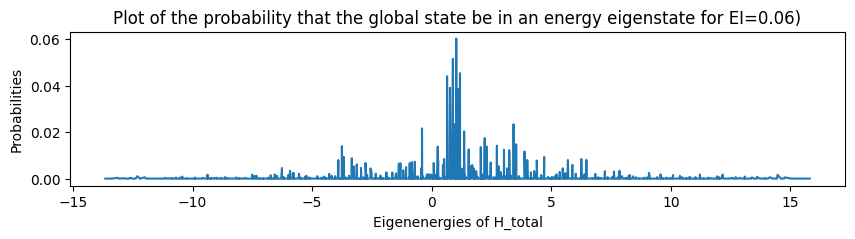

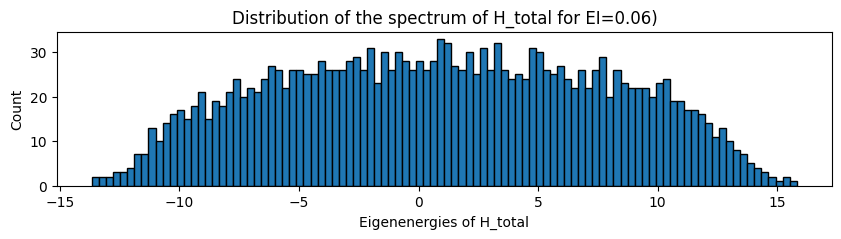

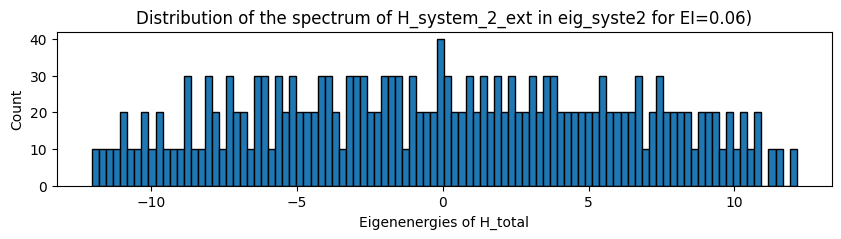

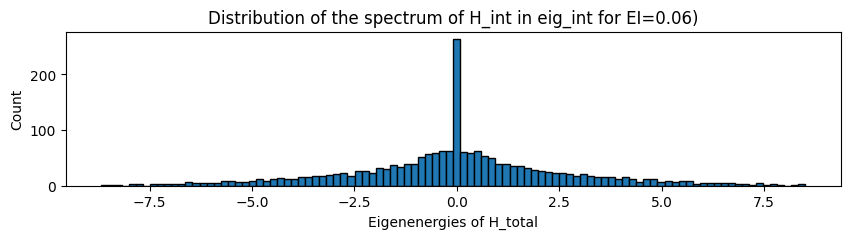

In [24]:
plot_e_spectrum_all(H_total,H_system_2,H_system_1_ext,H_system_2_ext,H_interaction, result,Int_strength)

In [41]:
#I want to check that the eigenstates of 1xHe and HqxHe' are related, by the fact that they share eigenstates in the system 1 subspace

#result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total

eigenenergies_total, eigenstates_total = H_total.eigenstates()
eigenenergies_2, eigenstates_2 = H_system_2_ext.eigenstates()
eigenenergies_q, eigenstates_q = H_interaction.eigenstates()


In [42]:
print()

Quantum object: dims = [[10, 200], [1, 1]], shape = (2000, 1), type = ket
Qobj data =
[[ 0.        +0.j        ]
 [ 0.        +0.j        ]
 [ 0.        +0.j        ]
 ...
 [-0.0303538 +0.01800133j]
 [ 0.06498311+0.0582681j ]
 [-0.00644733+0.02302111j]]


In [45]:

#Now I need to project an eigenstate of H_q in H_system_2_ext to see if it has 200 nonzeros
proj=[]
for i in range(len(eigenstates_2)):
    proj.append(np.vdot(eigenstates_q[0], eigenstates_2[i]))
num_nonzeros = np.count_nonzero(proj)  # Count the number of non-zero elements
print(num_nonzeros)


200


The fact that I get 200 tells me that H_int and H_env have eigenstates defined similarly on the system.
ie, an eigenstates of H_int is different than an eigenstate of H_env in 200 ways, which comes from them being differently defined in the 200 dimensional environment.

In [ ]:


"""

    min_energy=min(eigenenergies_total)
    max_energy=max(eigenenergies_total)
    min_energy_syst_2=min(eigenenergies_syst_2)
    max_energy_syst_2=max(eigenenergies_syst_2)
    min_energy_int=min(eigenenergies_int)  
    max_energy_int=max(eigenenergies_int)
    
    state = result.states[0]
    energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
    c = np.count_nonzero(energy_coeff)
    num_bins=100
    
    plt.figure(figsize=(10, 2))
    plt.plot(eigenenergies_total,energy_coeff);
    plt.title(f"Plot of the probability that the global state be in an energy eigenstate for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Probabilities")
    plt.show()
    
    #looks like a nice wigner semicircle, this is the thing, who's shape changes as the interaction energy increases. lets check that
    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_total, bins=num_bins, range=(min_energy, max_energy), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_total for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_syst_2, bins=num_bins, range=(min_energy_syst_2, max_energy_syst_2), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_system_2_ext in eig_syste2 for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()

    plt.figure(figsize=(10, 2))
    plt.hist(eigenenergies_int, bins=num_bins, range=(min_energy_int, max_energy_int), edgecolor='black');
    plt.title(f"Distribution of the spectrum of H_int in eig_int for EI={EI})")
    plt.xlabel("Eigenenergies of H_total")
    plt.ylabel("Count")
    plt.show()
"""

In [14]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.1# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.052
# Define the time settings for the simulation
tmax= 20
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)

In [12]:
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
tmax= 100
ind_nb = 100
q2=4
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)

3.001694628077805


In [15]:
#This is the piece of code I used to find the mean overlap between newly initialized eigenstates. But note that this is for a very specific set of parameters
def get_mean_rd_overlap(d1=10, d2 =200,w = 0.3,E_spacing = 1.0, Int_strength = 0.052,tmax= 20,ind_nb = 100)
    # Create basis states for system 1 and system 2
    basis_system_1 = [qt.basis(d1, i) for i in range(d1)]
    basis_system_2 = [qt.basis(d2, i) for i in range(d2)]
    ket_0 = qt.basis(d1, 3)  # |0> state
    ket_1 = qt.basis(d1, 7)  # |2> state, int(dim_system_1/2)
        
    # Define random Hermitian matrices as Hamiltonians for system 1 and system 2
    H_system_1 = qt.qeye(d1) #qt.rand_herm(dim_system_1)  # Random Hermitian matrix for system 1
    energy_spacing = E_spacing  # Adjust as needed
    diagonal_elements = np.arange(0, d1) * 1.0
    H_q = qt.Qobj(np.diag(diagonal_elements)) # Create a diagonal matrix with increasing diagonal elements
    H_system_2_1 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_2 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_3 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_4 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_5 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_6 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_7 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_8 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_9 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    H_system_2_10 = qt.rand_herm(d2,1)  # Random Hermitian matrix for system 2
    # Define initial states for system 1 and system 2
    initial_state_system_1 = (math.sqrt(w)*ket_0 + math.sqrt(1-w)*ket_1).unit()
    #initial_state_system_2 = qt.rand_ket(dim_system_2)
    ev1 ,es1 = H_system_2_1.eigenstates()
    ev2 ,es2 = H_system_2_2.eigenstates()
    ev3 ,es3 = H_system_2_3.eigenstates()
    ev4 ,es4 = H_system_2_4.eigenstates()
    ev5 ,es5 = H_system_2_5.eigenstates()
    ev6 ,es6 = H_system_2_6.eigenstates()
    ev7 ,es7 = H_system_2_7.eigenstates()
    ev8 ,es8 = H_system_2_8.eigenstates()
    ev9 ,es9 = H_system_2_9.eigenstates()
    ev10,es10 = H_system_2_10.eigenstates()

    initial_state_system_2_1 = es1[round(d2/2)]
    initial_state_system_2_2 = es2[round(d2/2)]
    initial_state_system_2_3 = es3[round(d2/2)]
    initial_state_system_2_4 = es4[round(d2/2)]
    initial_state_system_2_5 = es5[round(d2/2)]
    initial_state_system_2_6 = es6[round(d2/2)]
    initial_state_system_2_7 = es7[round(d2/2)]
    initial_state_system_2_8 = es8[round(d2/2)]
    initial_state_system_2_9 = es9[round(d2/2)]
    initial_state_system_2_10 = es10[round(d2/2)]
    #define initial state of full system
    states=[]
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_1))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_2))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_3))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_4))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_5))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_6))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_7))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_8))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_9))
    states.append(qt.tensor(initial_state_system_1, initial_state_system_2_10))

    interaction_strength = Int_strength  # Adjust as needed
    H_interaction = interaction_strength * qt.tensor(H_q, qt.rand_herm(d2,1))  
        
    H_system_1_ext = qt.tensor(H_system_1, qt.qeye(d2))
    H_system_2_ext = 0.75*qt.tensor(qt.qeye(d1), H_system_2_1)
    H_total = H_system_1_ext + H_system_2_ext + H_interaction

    eigenenergies_total, eigenstates_total = H_total.eigenstates() 

    st=[]
    for s in states:
        st.append(s.full().squeeze())

    state_0=st[0]
    p_0=[abs(np.vdot(state_0, eigenstate)) for eigenstate in eigenstates_total]
    st.pop(0)

    overlap_list=[]
    for s in st:
        p = [abs(np.vdot(s, eigenstate)) for eigenstate in eigenstates_total]
        overlap_list.append(np.dot(p_0, p))

    print(overlap_list)
    mean_overlap = np.mean(overlap_list)
    return mean_overlap


[0.6575393373203218, 0.6272619971377673, 0.6244594138846946, 0.599408046421883, 0.6360067815403532, 0.6386276071728184, 0.6543368583378546, 0.6390818315207851, 0.6194126501065843]
0.632903835938118


In [1]:
get_mean_rd_overlap()

NameError: name 'get_mean_rd_overlap' is not defined

In [ ]:
#Luckily, being in the case where the system has no self-interaction, we can verify that the Schmidt states do converge to the pointer states. The pointer states will correspond to eigenstates of the interaction Hamiltonian.
#just do a gif where we see the Schmidt state of the environment projected in the eigenbasis of the interaction Hamiltonian. We should see the Schmidt state converging to a delta


We try a simple run, the usual interesting parameters

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.0321
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_interf(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

Next we try see what happens when we match the weights.
We seem to get a bounded distribution again, but no behavior of converging to a restricted distribution like we had above.

In [ ]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
q2=4
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 
make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_interf(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)


3.001694628077805


In [ ]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
q2=5
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 
make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_interf(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)


3.8353103994241056


In [ ]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
q2=6
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 
make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,q1,d1,d2,E_spacing,tmax,ind_nb)

4.668926170770407


We try to characterize it a bit more, by producing simulations where the result is very visible. present in both, or not visible at all.

EI=0.04, w=0.3, E_s=1 quite visible
EI=0.04, w=0.1, E_s=1 quite visible, disapears really fast
EI=0.04, w=0.3, E_s=0.5 quite visible, outsides did not fully go to zero.
EI=0.1, w=0.3, E_s=1 strong effect, faster.
EI=0.01, w=0.3, E_s=1 quite visible

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.01
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

What I need to do is measure how much sum of probabilities exists in between some bound.
Or I need to study teh Hamiltonians to try and understnad if it could be numerical.


In [ ]:


def occupation(tlist,result,eigenstates_total,eigenenergies_total,EI,w,eps=0.001):
    c1_t=[]
    c2_t=[]
    for idx in range(len(tlist)-1):
        state = compute_schmidt_full(result,idx+1,1)
        state2 = compute_schmidt_full(result,idx+1,2)
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        energy_coeff2=[abs(np.vdot(state2, eigenstate)) ** 2 for eigenstate in eigenstates_total]
        count1 = sum(1 for coeff in energy_coeff if coeff > eps)
        count2 = sum(1 for coeff in energy_coeff2 if coeff > eps)
        c1_t.append(count1)
        c2_t.append(count2)
    plt.plot(tlist[0:len(tlist)-1], c1_t)
    plt.plot(tlist[0:len(tlist)-1], c2_t)
    plt.title(f"Plot of the occupation of Hilbert space by Schmidt1 and 2 over time for EI={EI}, w={w}, eps={eps}")
    plt.xlabel("Time")
    plt.ylabel("Count")
    plt.show()
    #return c1_t, c2_t


In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.0321
# Define the time settings for the simulation
tmax= 30
ind_nb = 200
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 




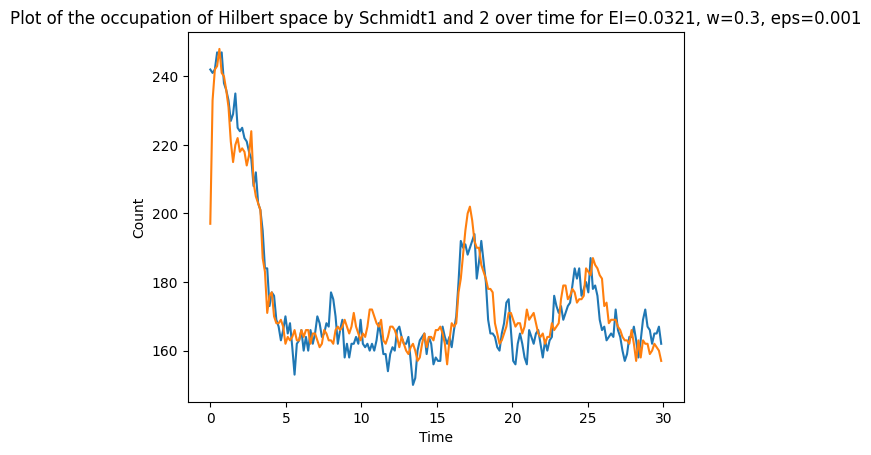

In [ ]:
occupation(tlist,result,eigenstates_int,eigenenergies_int,Int_strength,w,eps=0.001)
make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

What teh gifs and the occupation graph shows us, is that they have the same behavior in occupation spacde, but not the same at all in H_I eigrnstate space. indeed, there is not hint of of a distinction between s1 and s2 in occupation number in the HI basis, but there very much is a change we can see in the distribution.

Potential question. do they both start at a certai n nuymbe and half it by interference. ie sharing? How could this be figured out?

Maybe some sort of map of interference? Show a plot of how hight the interference is in each eigenstate

Looking at the cases where one of the schmidt has the interesting behavior, we see that the interference is still non-zero over the whole space, ut dies down overall after a little while. That is to say that the interferece is uniform.


THis behavior might be related to the fact that both schnmidts are bounded in this space for q1=3.0002.

The only thing that makes me think no, is the fact that there is a run-up to that behavior.

idea. try to define a weirder, different distribution by playing around with q1, q2....

In [ ]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
#q2=6
#q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
#print(q1)
#k0=round(q1)
#k1=q2
k0=5
k1=6


result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 
make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[k0,k1],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[k0,k1],d1,d2,E_spacing,tmax,ind_nb)

result of this one is to make very 2 small areas in which they are defined. So I understand that the bounds are for sure defined by the energies reached by the schmidt. ie, s1 has no value in the highest interaction energy eigenstates because they are of scale 10*highest random.

I dont really get how the interactino energie appears here. 
Basically, I think taht the defined space is proportional to the effective energy.

Really need to explain the cases where its just bounded, and the cases where we have suppression of some dof.

One thing I can say, is that the concentration for s2 starts high in 2 points! which might have to do with 2 energy scales being present.

In [ ]:

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

In [ ]:
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.03
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.09
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.1# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.04
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

Now we need to answer a few questions.

How does s2 aquire this behavior? What determines the bounds of the space in which s2 converges? (EI seems to play a role, which makes sense since by increasing it makes the energy space be defined over a larger energy spectrum. is it proportional though?.) 

Does s2 get suppressed by interferences? 

Do they converge to pointer states? 

Why not s1? Is it a model thing? 

Is it some sort of einselection. 




We start with checking if they have pointer state like properties (They seem to)

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.06
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 


In [ ]:
#testing the pointer state theory. 
#Pointer states are selected by the interaction, they have the property of producing the least entropy/or purity. The point is, start the simulation in these states and see if the entropy increases.

def pointer_results(s,H_total,tmax= 10, ind_nb = 100):

    tlist = np.linspace(0, tmax, ind_nb)  # Adjust the time range and step count as needed
    
    # Perform time evolution of the combined system
    result = qt.mesolve(H_total, s, tlist, [], [])
    
    return result




In [ ]:
idx=90
s1 = qt.Qobj(compute_schmidt_full(result, idx,1)).unit()
s2 = qt.Qobj(compute_schmidt_full(result, idx,2)).unit()


In [ ]:
result_p1 = pointer_results(s1,H_total,tmax, ind_nb)
result_p2 = pointer_results(s2,H_total,tmax, ind_nb)


/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/maringirard/Dev/Quantum_Branching/Quantum_Branching/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


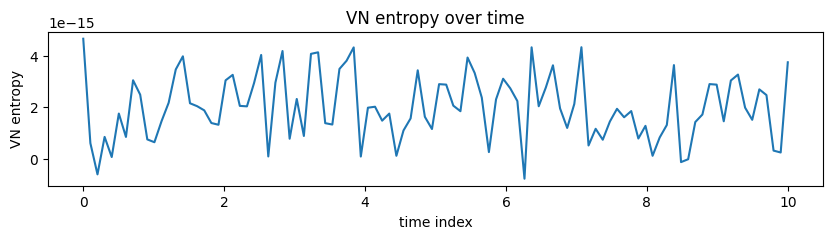

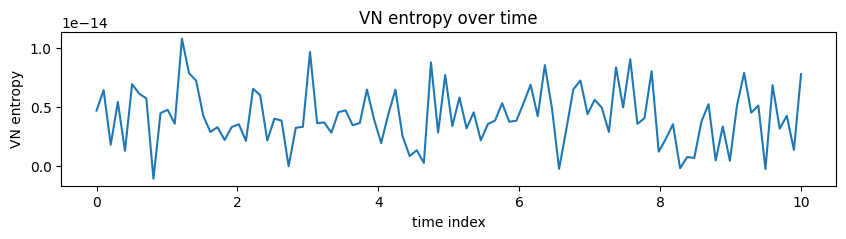

In [ ]:
#Now we plot the change in entropy of the system when we start in the pointer state

plot_VN(result_p1, tlist)
plot_VN(result_p2, tlist)

In [ ]:
# to get something better to show, i need to make a function that calculate s1 s2 at every step of the way, plot entropy for totla state and schmidts, on the same graph. there was really no need to re-evolve the schmidt states after a first evoliution.


In [ ]:
def compute_VN_p(result, time_index, subsystem_index=0):
    density_matrix = qt.ptrace(result[time_index], [subsystem_index])  # Calculate the density matrix at the specified time
    entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
    return entropy

def compute_VN_time_p(result,tlist):
    von_neumann_entropy = []
    for time_index in range(len(tlist)):
        entropy = compute_VN_p(result, time_index, subsystem_index=0)
        von_neumann_entropy.append(entropy)
    return von_neumann_entropy

def plot_VN_p(result,tlist,log=0):
    v = compute_VN_time_p(result,tlist)
    plt.figure(figsize=(10, 2))
    plt.plot(tlist[0:99], v)
    if log == 1:
        plt.xscale('log')
    else:
        plt.xscale('linear')
    plt.title("VN entropy over time")
    plt.xlabel("time index")
    plt.ylabel("VN entropy")

In [ ]:
#function to plot the Entropy of the global state and of the Schmidt states.
def plot_VN_tot_schmidt(result,tlist):
    s1_list=[]
    s2_list=[]
    for idx in range(len(tlist)-1):
        s1 = qt.Qobj(compute_schmidt_full(result, idx+1,1))
        s2 = qt.Qobj(compute_schmidt_full(result, idx+1,2))
        s1_list.append(s1)
        s2_list.append(s2)
    print("made pointers")

    v1 = compute_VN_time(result,tlist[0:len(tlist)-1])
    v2 = compute_VN_time_p(s1_list,tlist[0:len(tlist)-1])
    v3 = compute_VN_time_p(s2_list,tlist[0:len(tlist)-1])

    plt.figure(figsize=(10, 2))
    plt.plot(tlist[0:99], v1)
    plt.plot(tlist[0:99], v2)
    plt.plot(tlist[0:99], v3)
    plt.title("VN entropy over time")
    plt.xlabel("time index")
    plt.ylabel("VN entropy")
    plt.legend(["Total state","Schmidt 1", "Schmidt 2"])
    plot_VN(result,tlist[0:99])
    plot_VN_p(s1_list, tlist[0:99])
    plot_VN_p(s2_list, tlist[0:99])
    #plt.savefig()

made pointers


/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/Quantum_Branching/VN.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_24118/2016028206.py:3: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/var/folders/ty/2v67w7m97_g8zp6lgsqd1dsr0000gn/T/ipykernel_24118/2016028206.py:3: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/mar

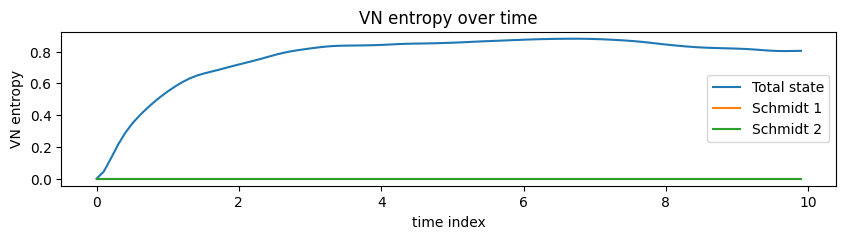

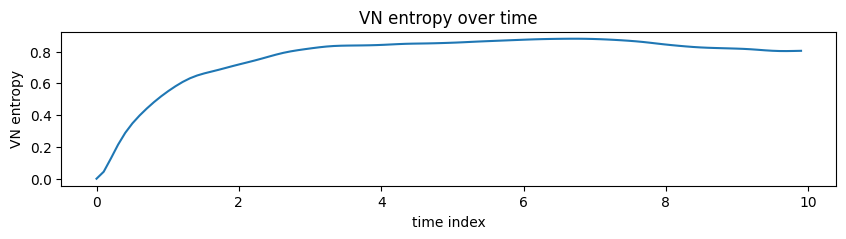

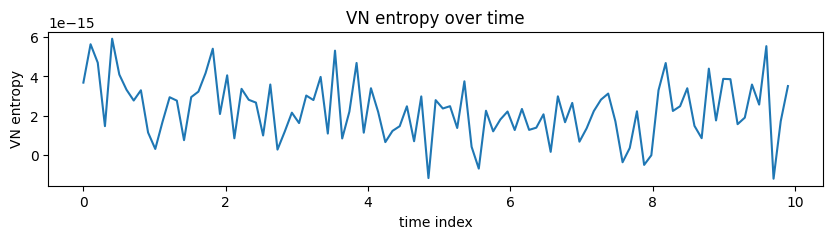

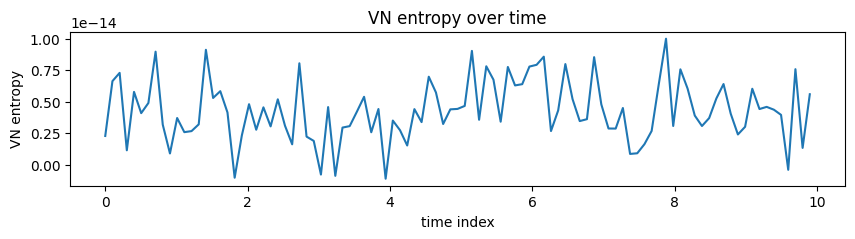

In [ ]:

plot_VN_tot_schmidt(result,tlist)




Issue. Of course the entropy of Schmidt states are low and look like noise. they are. Schmidt states are pure product states of |q1> and some linear combination of environment states....

If I look at evolution of Schmidt entrop during regular evolution or having picked them up from after regular evolution and coohsing them as starting point, I get 0 constant entropy. 
This model by having no self interaction, get ride of the pointer state selection by choosing to look at the Schmidt states which minimize the entropy in time (to 0). 

This does help with my understanding of Pointer states though. With self interactionl we would have a potential mixing of the system state, which interacting differently would entangle differently with the environment. So a pointer state is one where entanglement does not change over time in teh sense that the observed result does not "drift" into another superposition?? 

We clearly have a sort of stabilization of Schmdit 2 to only be defined in the center energy eigenstates of H_int. why is that???? So what is it we are actually looking for? Dont know, but there is still that weird behavior of Scmidt 2. We now attempt to verify that it is not a particlarity of the model.






In [ ]:
#We look at w=0.7, which has never failed us at inverting things around.

In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.7# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.0321
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

In [ ]:
# so we have checked that being the Schmidt that centers is conditioned on having the larger weight. What if we make them equal?


In [ ]:
#Trying to get exactly equal weights for both Schmidts.

#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.41# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.05
# Define the time settings for the simulation
tmax= 10
ind_nb = 100
q2=4
q1=2*(np.sqrt(w)/np.sqrt(1-w)-1)+q2*np.sqrt(w)/np.sqrt(1-w)
print(q1)
k0=round(q1)
k1=q2

result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result_more(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,1,k0,k1)
eigenenergies_total, eigenstates_total = H_total.eigenstates() 


3.8353103994241056


In [ ]:
make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

!! They both have it !!
making the weights equal, makes both Schmidt states get "selected" in the same energy bounds. 
Could this be a question of energy bounds? they actually all select, its just that w makes one go above in energy. Since higher energy makes the bound expand. It is s2, divided by the larger number, ie having the smaller effective interaction energy, which looks selected. 

By making the Amplitudes equal, we have made the effective interaction energies equal, can we also make both look selected by just lowering the interaction energy? Lets try.

By making the Amplitudes equal, it looks like the schidt states are pre-selected. like they dont need to change much at all on the basis of the interaction hamiltonian,... there is no fluctuation outside of the bounds..
 

In [ ]:
print(1/np.sqrt(0.3))
print(1/np.sqrt(0.7))

1.8257418583505538
1.1952286093343936


In [ ]:
#testting the zoom
#defining all quantities used in the simulation
d1, d2 = 10, 200
w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
E_spacing = 1.0
Int_strength = 0.007
# Define the time settings for the simulation
tmax= 100
ind_nb = 100
result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 

make_gif_distrib_pointer_s1(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)
make_gif_distrib_pointer_s2(Int_strength,w,result,eigenstates_int,eigenenergies_int,[0],d1,d2,E_spacing,tmax,ind_nb)

So lowering the interaction strength, hoping to see both in the picture did not work. It may be a case of relative effetive interactino strength??? 


I imagine that the selection pressure exerted on schmidt 2 is interference. Could it be that


Can I see it like a phase transition.... suddenly the macroscopic behavior of s1 (or s2) changes. ie an infinitesimal change in some parameter creats a macro change....
How close do the weights have to be? 

Can we measure this phenomena? dont really care when it arrives, just maybe its width?

In [ ]:
def selection_bounds(idx,EI=[0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.085,0.09,0.095],w=0.3, eps = 0.006):
    bound_list=[]
    ener_list=[]
    d1, d2 = 10, 200
    w = 0.3# smallest weight of the 2 eingestates, set btw 0 and 1
    E_spacing = 1.0
    # Define the time settings for the simulation
    tmax= 10
    ind_nb = 100
    for Int_strength in EI:
        result, tlist, H_q, H_system_2, H_system_1_ext, H_system_2_ext, H_interaction, H_total, ket_0, ket_1, initial_state_system_2 = generate_result(d1,d2,w, E_spacing, Int_strength, tmax, ind_nb,0)
        eigenenergies_int, eigenstates_int = H_interaction.eigenstates() 
        state = compute_schmidt_full(result,idx,2) 
        print("schmidt generated")
        energy_coeff=[abs(np.vdot(state, eigenstate)) ** 2 for eigenstate in eigenstates_int]
        l=len(energy_coeff)
        a=0
        for i in range(l):
            if energy_coeff[i]>eps:
                a = i
                print(a)
                break
        print(f"found bound {a}")
        bound_list.append(a)
    for j in range(len(bound_list)):
        ener_list.append(eigenenergies_int[bound_list[j]])

    # Clear previous plot
    plt.clf()
    plt.plot(EI,ener_list)
    plt.title(f"Plot of the energy bounds for schmidt 2, for various values of EI, EI={EI} and w={w} eps {eps}")
    plt.xlabel("EI")
    plt.ylabel("Bound beyond which Schmidt 2 has no probabilities.")


schmidt generated
401
found bound 401
schmidt generated
388
found bound 388
schmidt generated
391
found bound 391
schmidt generated
388
found bound 388
schmidt generated
386
found bound 386
schmidt generated
392
found bound 392
schmidt generated
442
found bound 442
schmidt generated
409
found bound 409
schmidt generated
381
found bound 381
schmidt generated
394
found bound 394
schmidt generated
427
found bound 427
schmidt generated
412
found bound 412
schmidt generated
384
found bound 384
schmidt generated
429
found bound 429


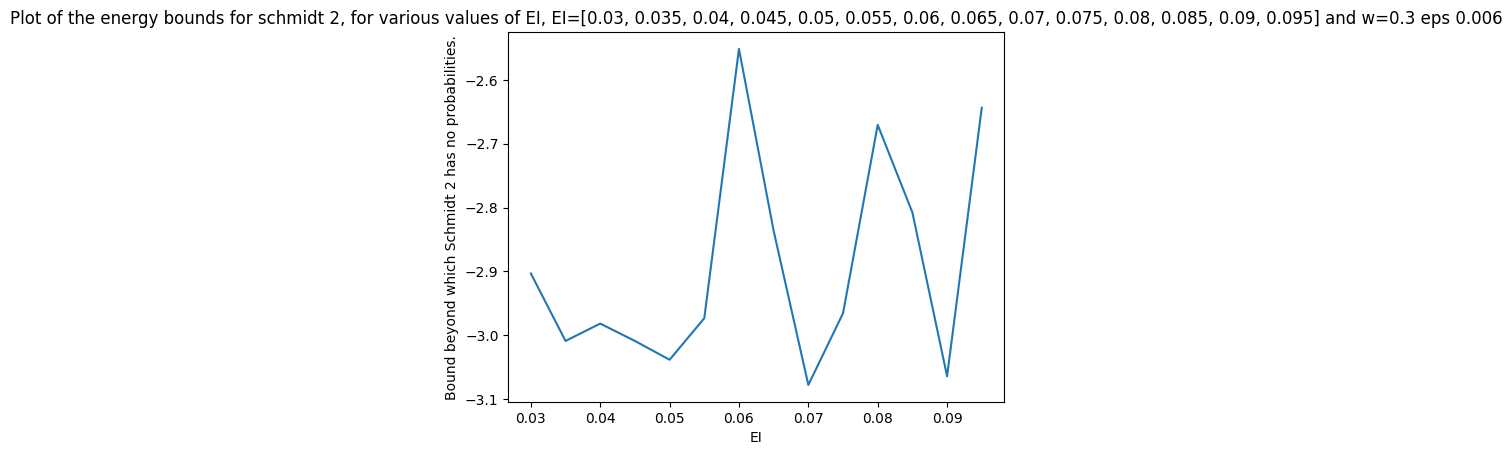

In [ ]:
idx=90
selection_bounds(idx)

Could there be an interest in looking at the effect of interferences in this basis...

